# EDA

In [1]:
%matplotlib inline

!pip install wquantiles

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
cp = pd.read_csv("data.csv")
cp

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [3]:
jumlah_fitur = cp.shape[1]

print("Jumlah fitur: ", jumlah_fitur)

Jumlah fitur:  10


In [4]:
jumlah_data = cp.shape[0]

print("Jumlah data: ", jumlah_data)

Jumlah data:  100


In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [6]:
# Missing Value Check
cp.isna().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

<ipython-input-7-c2d91b25d018>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cp.corr(),annot=True,vmin=0, vmax=1, center=True)


<Axes: >

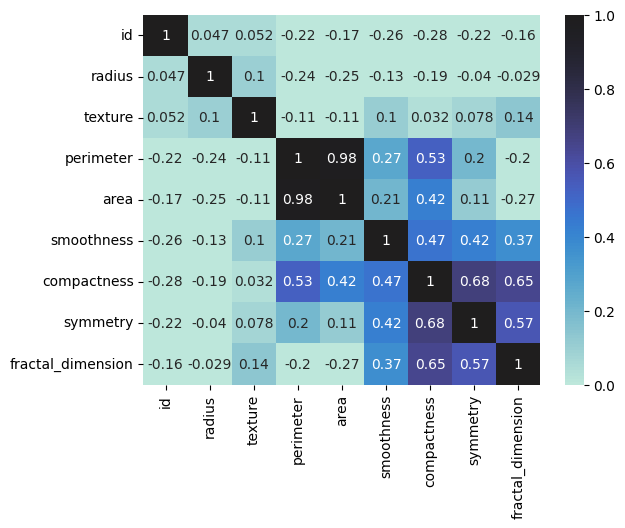

In [7]:
# Coleration Matrix Check
sns.heatmap(cp.corr(),annot=True,vmin=0, vmax=1, center=True)

In [8]:
np.random.seed(42)

In [9]:
cp.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [10]:
cp.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [11]:
cp.groupby('diagnosis_result').mean()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,,,,,,,,,
B,62.184211,17.947368,17.763158,78.500000,474.342105,0.099053,0.086895,0.184053,0.064605
M,43.338710,16.177419,18.516129,107.983871,842.951613,0.104984,0.151097,0.198758,0.064742


In [12]:
cp.diagnosis_result = [1 if each == 'M' else 0 for each in cp.diagnosis_result]

In [13]:
cp.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

In [14]:
cp2 = pd.get_dummies(cp,columns=['diagnosis_result'],drop_first=True)

In [15]:
cp2.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_1
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


# Data Standardization

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
scaler.fit(cp2[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']])
#removing the last column of the dataframe as this table will be used for the feature matrix
scaled_features=scaler.transform(cp2[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']])
new_data=pd.DataFrame(scaled_features,columns=cp2.drop(['diagnosis_result_1','id'], axis=1).columns)

In [18]:
new_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [19]:
new_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [20]:
x = new_data
y = cp2['diagnosis_result_1']

In [21]:
x

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593
...,...,...,...,...,...,...,...,...
95,1.266830,-0.431591,1.495071,1.763927,-0.805170,0.070681,0.549448,-1.071502
96,1.060841,-0.818669,-0.797201,-0.791806,0.155817,-0.915560,-0.103491,0.161527
97,0.442876,1.697335,-1.476393,-1.282205,-0.050109,-1.211432,-1.899074,0.531435
98,0.854853,1.116719,-0.966999,-0.911262,-0.873811,-0.849811,-1.017606,0.161527


# Data Splitting

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
method_names=[]
method_scores=[]

# Data Visualization

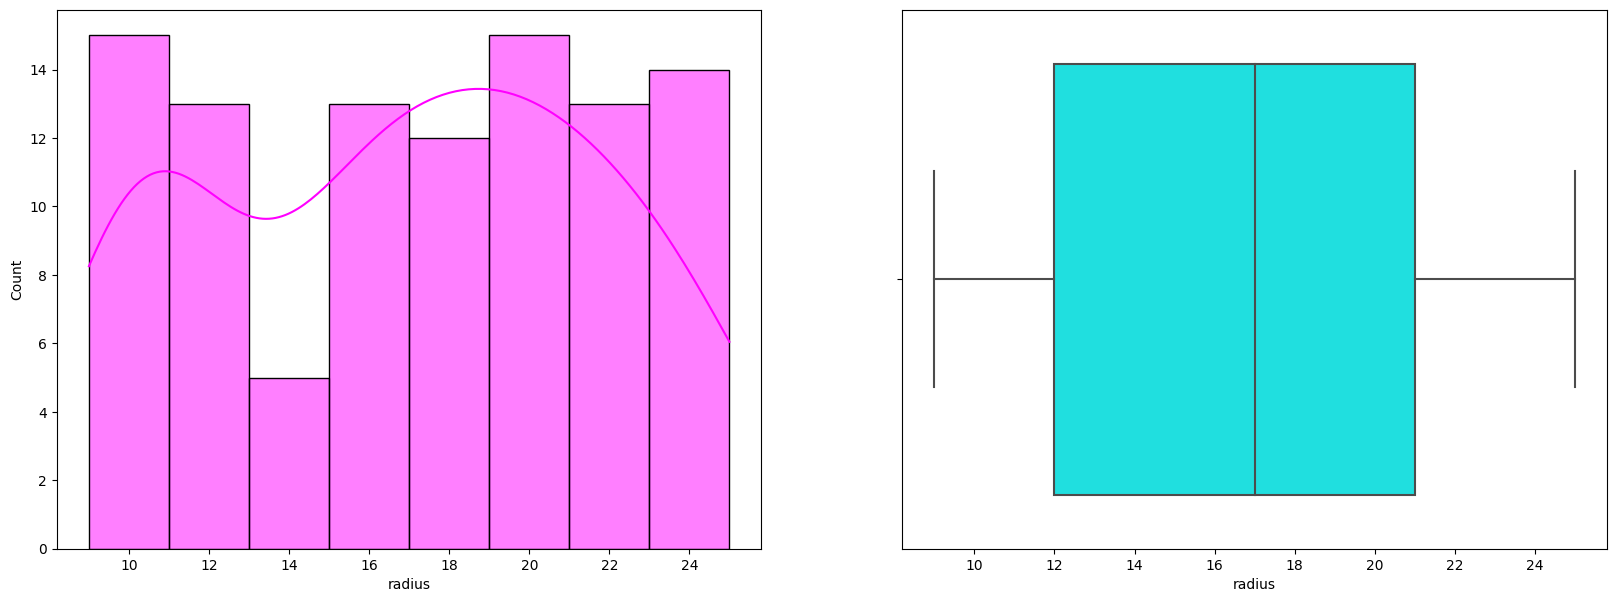

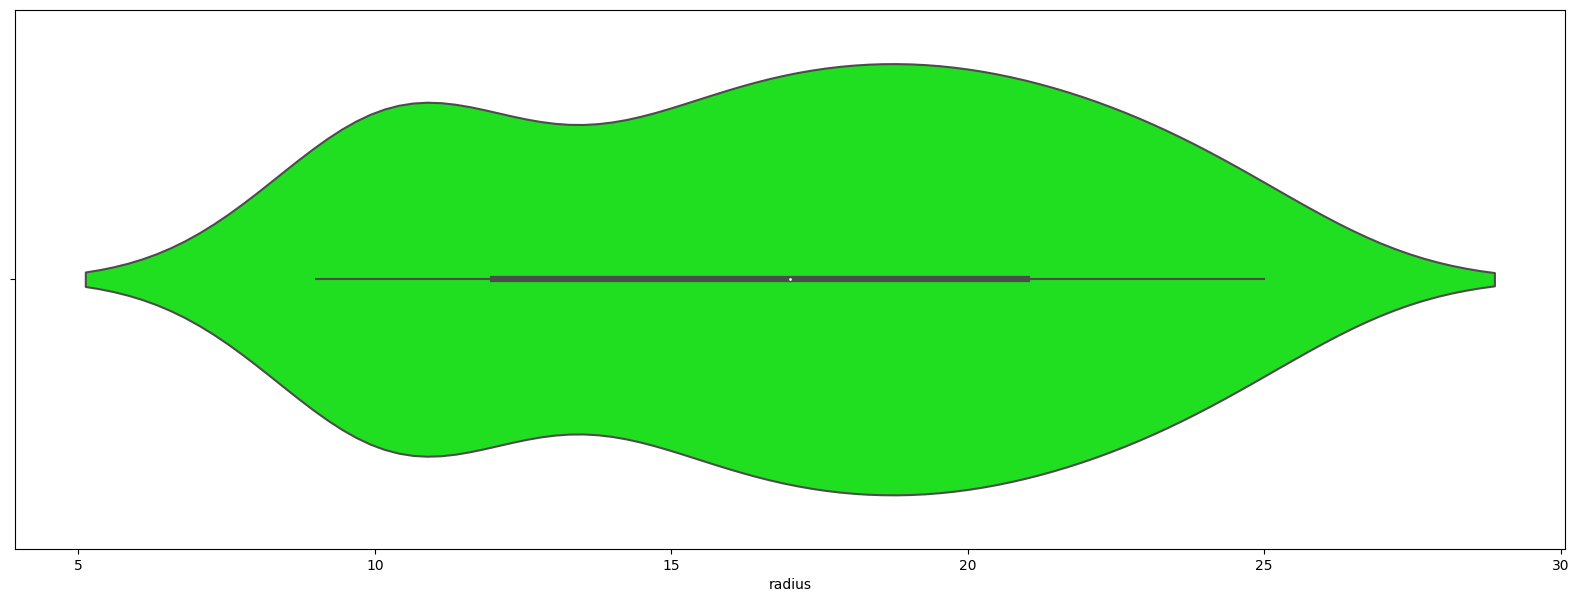

In [24]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=cp, x="radius", kde=True, ax=ax1[0],color = 'magenta')
sns.boxplot(data=cp, x="radius", ax=ax1[1],color = 'aqua')

sns.violinplot(data=cp, x="radius", ax=ax2,color = 'lime')

plt.show()


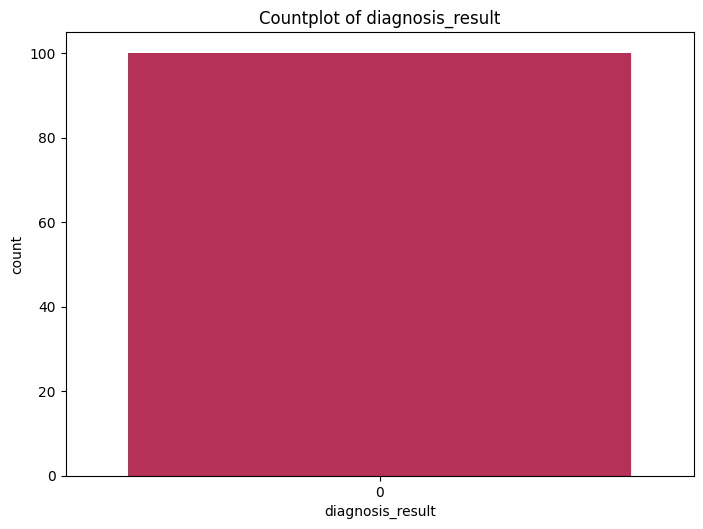

In [25]:
cols = ['diagnosis_result']

# Subplot setiap kategori
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(cp[column], palette='rocket', color='black')
        plt.xlabel(column)
        plt.title("Countplot of {}".format(column))

    plotnumber += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


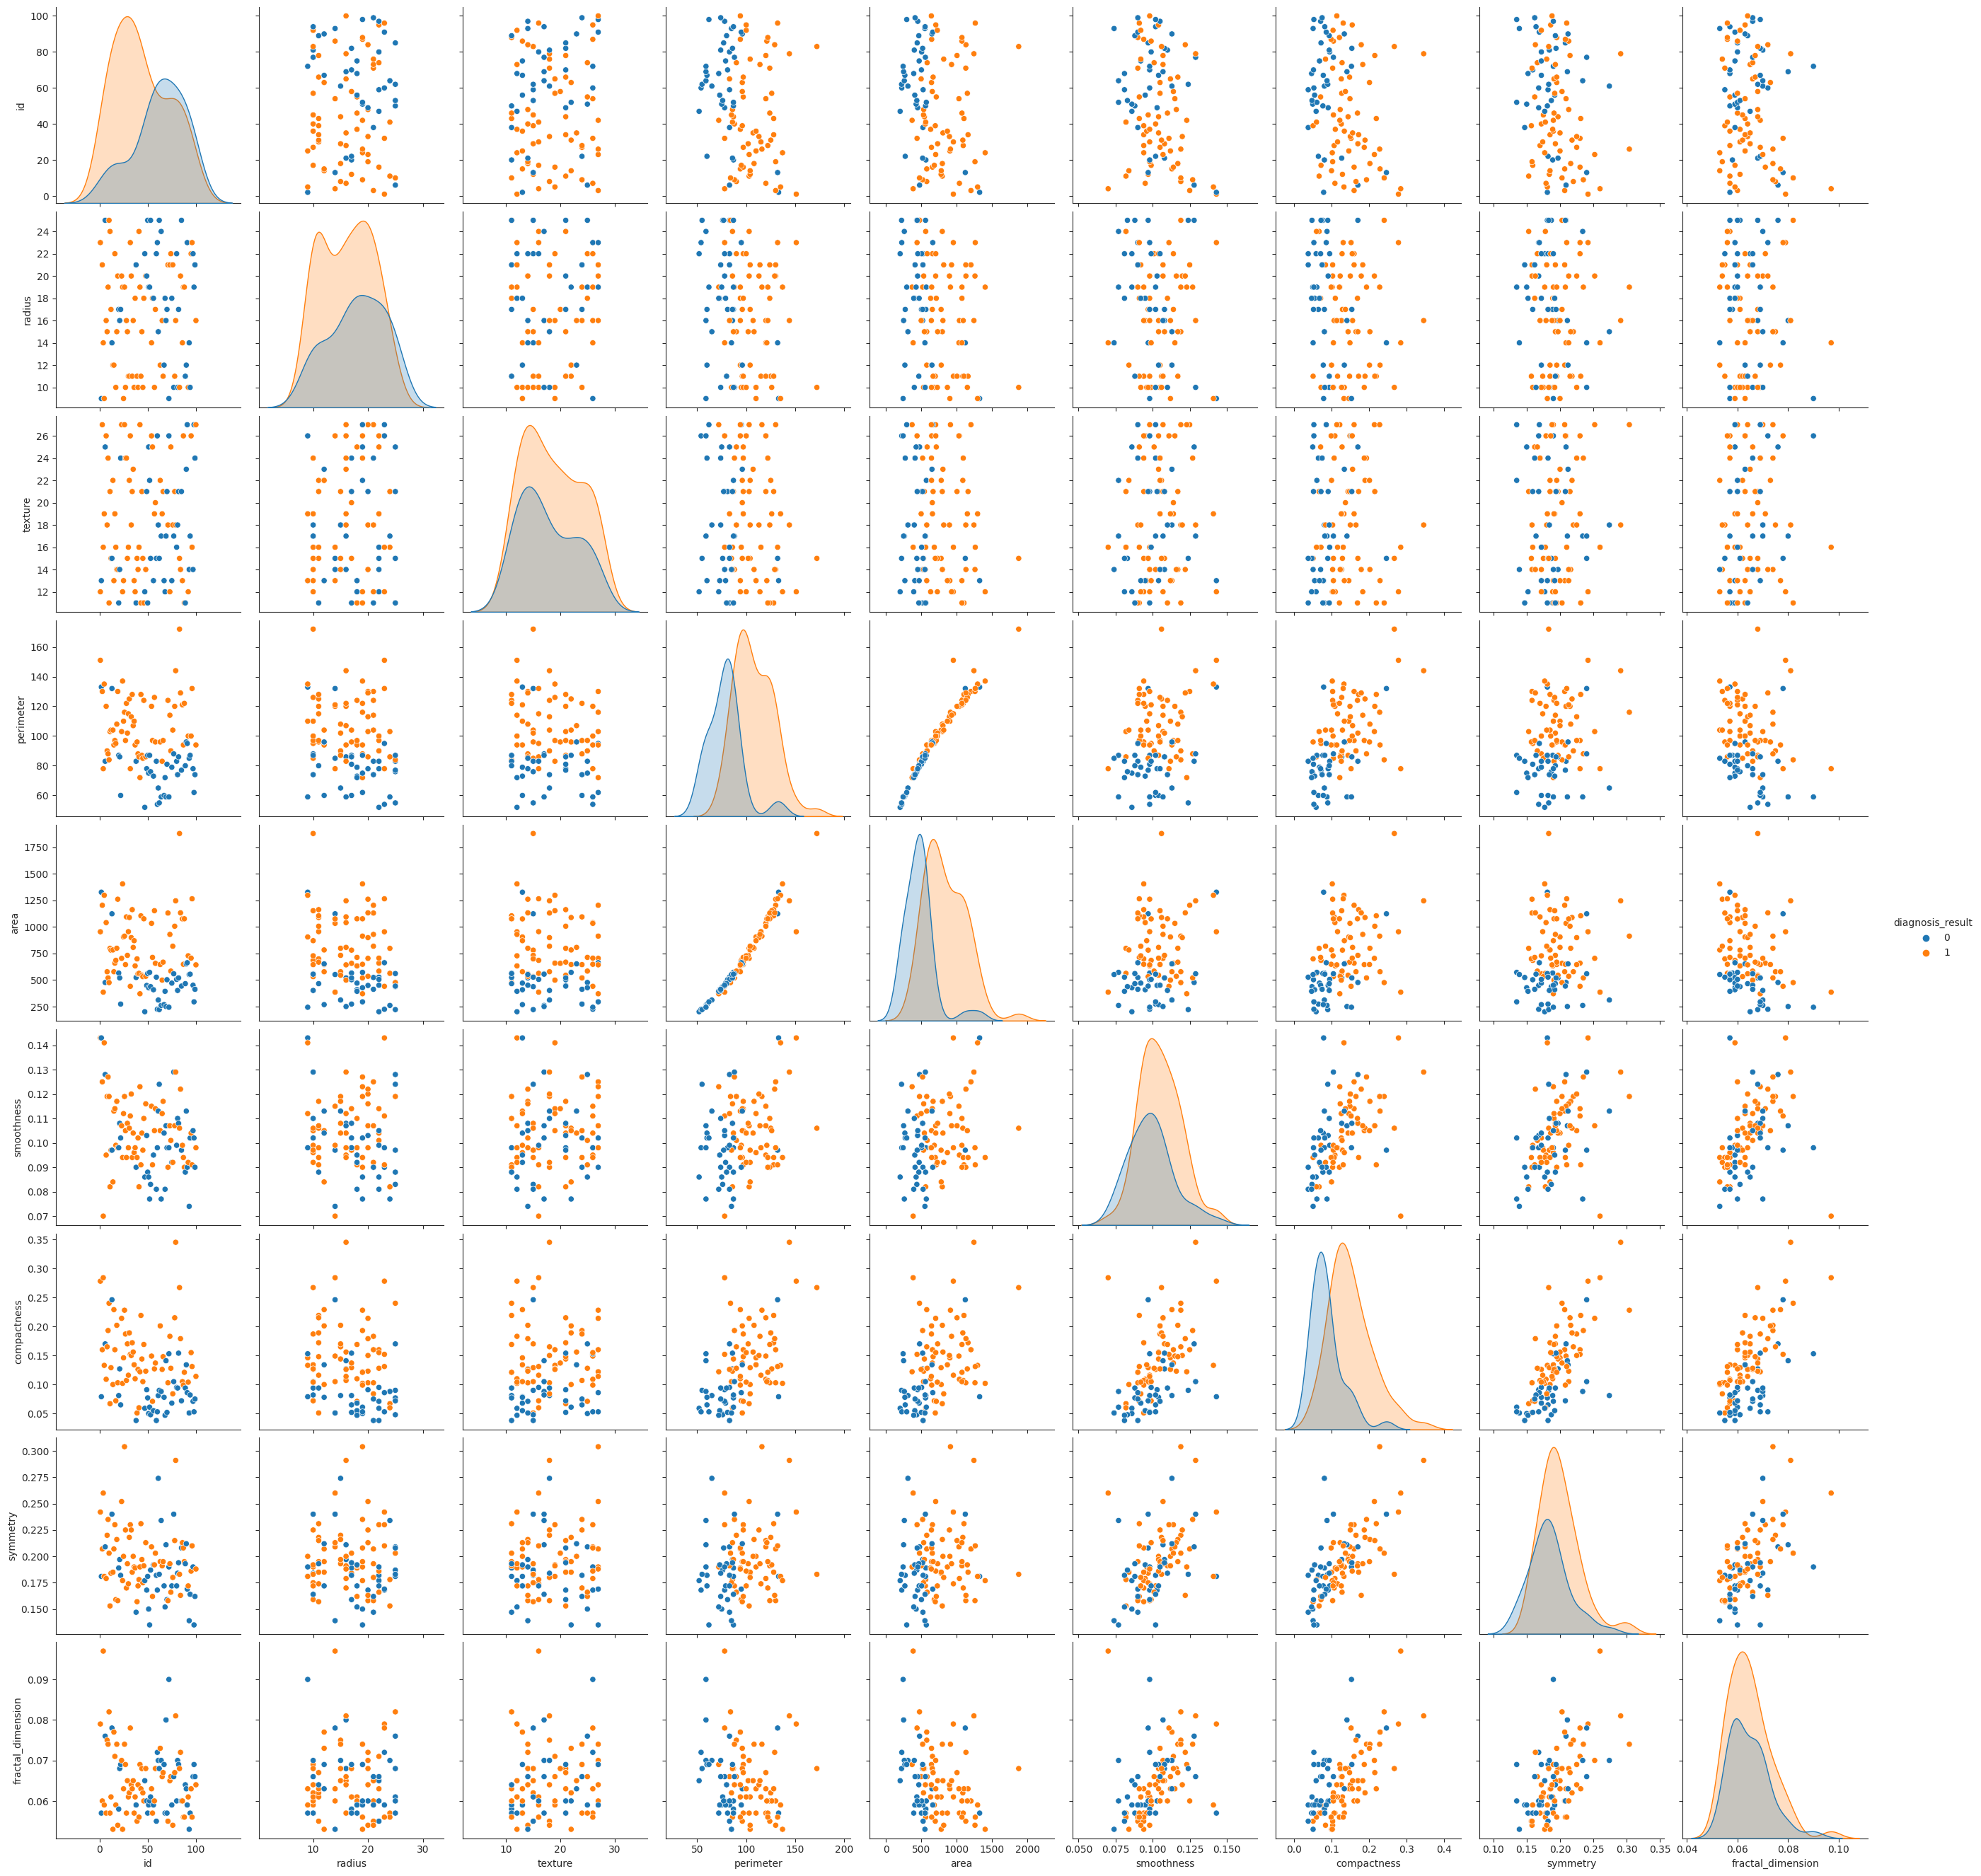

In [26]:
sns.set_style("ticks")
sns.pairplot(cp,hue="diagnosis_result",size=3);
plt.show()

# Add extraction feature (PCA)

In [27]:
pca = PCA(n_components=8)  # Ubah jumlah komponen sesuai kebutuhan
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Classification (KNN)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Distance Function

In [29]:
def euclidean(p1,p2):
  dist = np.sqrt(np.sum((p1-p2)**2))
  return dist

In [30]:
def predict(x_train, y, x_input, k, pca=None):
    if pca is not None:
        x_train = pca.transform(x_train)
        x_input = pca.transform(x_input)

    op_labels = []

    for item in x_input:
        point_dist = []

        for j in range(len(x_train)):
            distances = euclidean(np.array(x_train[j, :]), item)
            point_dist.append(distances)
        point_dist = np.array(point_dist)

        dist = np.argsort(point_dist)[:k]

        labels = y[dist]

        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)

    return op_labels

In [31]:
def euclidean(p1,p2):
  dist = np.sqrt(np.sum((p1-p2)**2))
  return dist

Calculate KNN

Masukkan nilai K 1
K = 1: 0.75


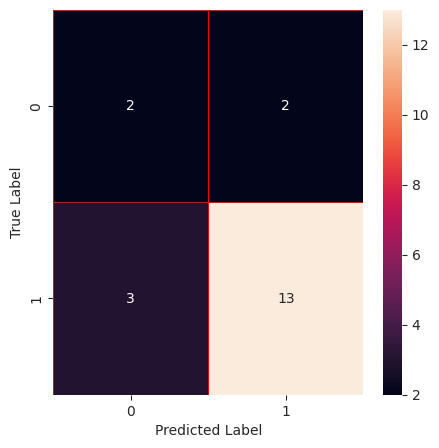

In [32]:
n_neighbors = int(input("Masukkan nilai K "))

knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=euclidean)
knn.fit(x_train_pca, y_train)

print("K = {}: {}".format(n_neighbors, knn.score(x_test_pca, y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test_pca, y_test))

# Confusion Matrix
y_pred = knn.predict(x_test_pca)
conf_mat = confusion_matrix(y_test, y_pred)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [33]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result_1, Length: 100, dtype: uint8

In [34]:
knn.fit(x_train_pca,y_train)
pred=knn.predict(x_test_pca)

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.87      0.81      0.84        16

    accuracy                           0.75        20
   macro avg       0.63      0.66      0.64        20
weighted avg       0.77      0.75      0.76        20



In [36]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_pca, y_train)
    pred_i = knn.predict(x_test_pca)
    error_rate.append(np.mean(pred_i != y_test))

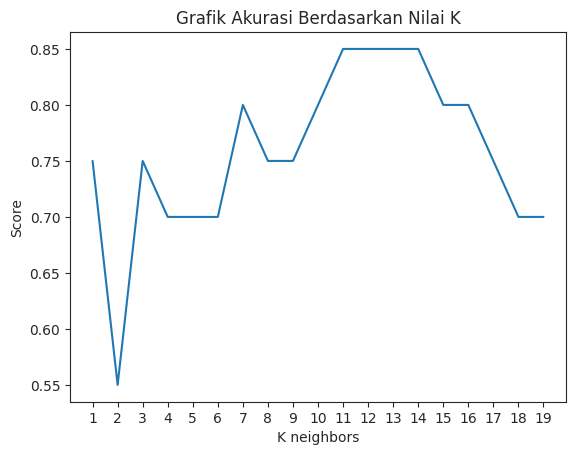

Maximum KNN Score is 85.00%
Accuracy Score is 85.00%


In [37]:
score = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train.values.ravel())
    score.append(knn.score(x_test, y_test.values.ravel()))

plt.plot(k_values, score)
plt.xlabel("K neighbors")
plt.ylabel("Score")
plt.xticks(range(1, 20))
plt.title("Grafik Akurasi Berdasarkan Nilai K")
plt.show()

acc = max(score) * 100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("Accuracy Score is {:.2f}%".format(acc))

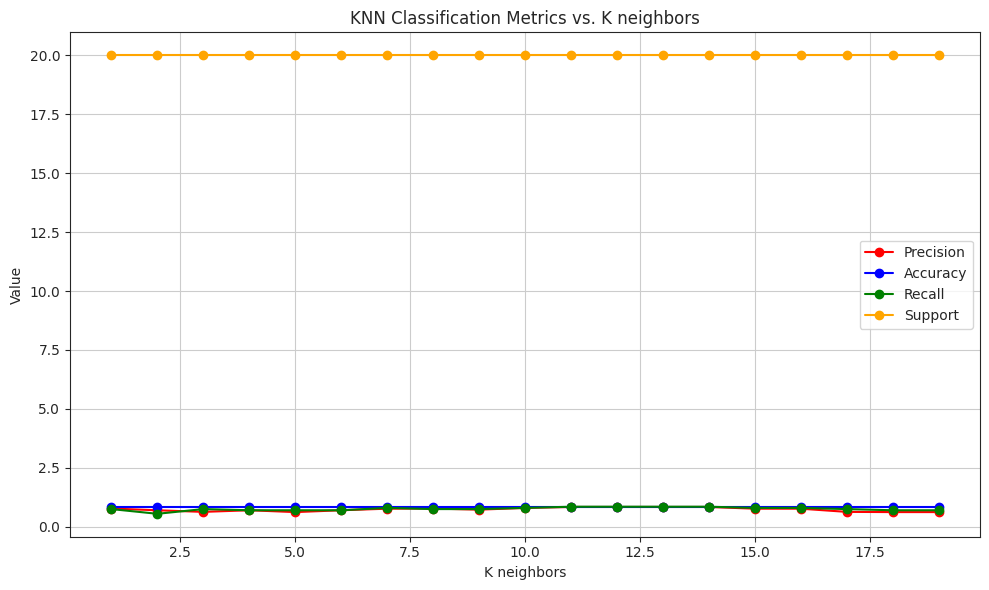

In [38]:
k_values = range(1, 20)
precisions = []
accuracies = []
recalls = []
supports = []

for k in k_values:
    # Fit KNN model with current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_pca, y_train)
    y_pred_knn = knn.predict(x_test_pca)

    # Get classification report
    report = classification_report(y_test, y_pred_knn, output_dict=True)

    # Extract Precision, Recall, and Support
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    support = report["weighted avg"]["support"]

    # Append metric values to the respective lists
    precisions.append(precision)
    recalls.append(recall)
    supports.append(support)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, precisions, marker='o', color='red', label='Precision')
plt.plot(k_values, [acc/100] * len(k_values), marker='o', color='blue', label='Accuracy')
plt.plot(k_values, recalls, marker='o', color='green', label='Recall')
plt.plot(k_values, supports, marker='o', color='orange', label='Support')
plt.xlabel("K neighbors")
plt.ylabel("Value")
plt.title("KNN Classification Metrics vs. K neighbors")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Masukkan jumlah Pohon: 10
Random Forest Algorithm Accuracy Score: 80.00%
Accuracy Score is 80.00%


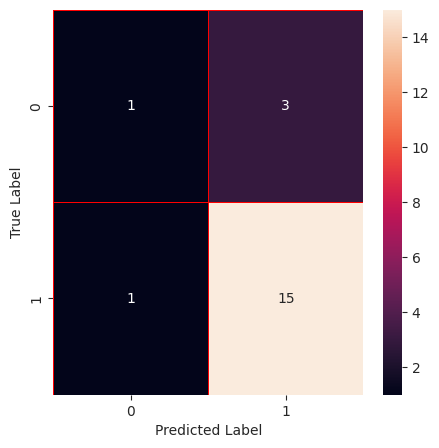

In [40]:
n_estimators = int(input("Masukkan jumlah Pohon: "))
rf = RandomForestClassifier(class_weight="balanced", n_estimators=n_estimators)
rf.fit(x_train_pca, y_train)

y_pred_rf = rf.predict(x_test_pca)
acc = metrics.accuracy_score(y_pred_rf, y_test.values.ravel()) * 100
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(acc))
print("Accuracy Score is {:.2f}%".format(acc))

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat_rf, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [41]:
rf.fit(x_train_pca, y_train.values.ravel())
y_pred = rf.predict(x_test_pca)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.82      0.88      0.85        16

    accuracy                           0.75        20
   macro avg       0.58      0.56      0.57        20
weighted avg       0.73      0.75      0.74        20



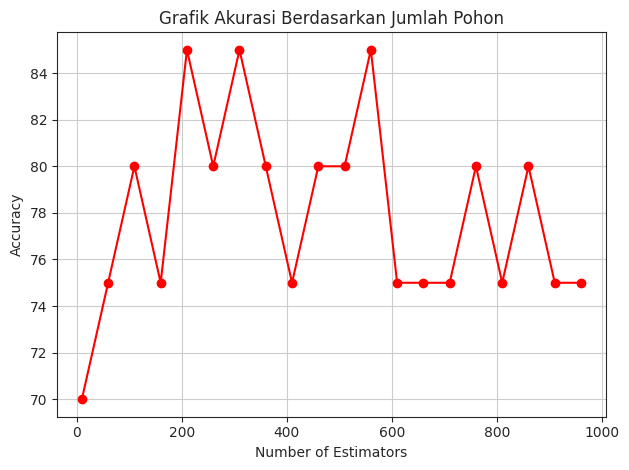

Maximum Random Forest Score is 85.00%
Accuracy Score is 85.00%


In [43]:
n_estimators_values = range(10, 1001, 50)

rf_accuracies = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(class_weight="balanced", n_estimators=n_estimators)
    rf.fit(x_train_pca, y_train)
    y_pred_rf = rf.predict(x_test_pca)
    acc = metrics.accuracy_score(y_pred_rf, y_test.values.ravel()) * 100
    rf_accuracies.append(acc)

# Plotting the results
plt.plot(n_estimators_values, rf_accuracies, marker='o', color='red')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Grafik Akurasi Berdasarkan Jumlah Pohon")
plt.grid(True)
plt.tight_layout()
plt.show()

acc = max(rf_accuracies)
print("Maximum Random Forest Score is {:.2f}%".format(acc))
print("Accuracy Score is {:.2f}%".format(acc))

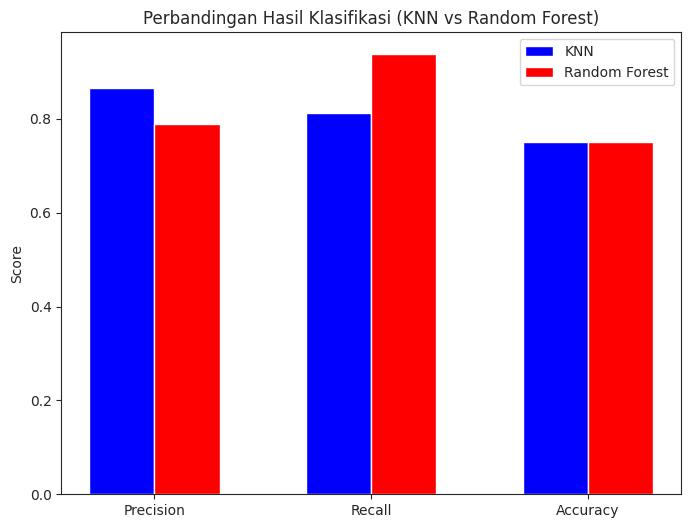

In [44]:
# Fit KNN and Random Forest models
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train_pca, y_train)

rf = RandomForestClassifier(class_weight="balanced", n_estimators=n_estimators)
rf.fit(x_train_pca, y_train)

# Make predictions
y_pred_knn = knn.predict(x_test_pca)
y_pred_rf = rf.predict(x_test_pca)

# Calculate precision, recall, and accuracy for both models
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Combine the results into a DataFrame
data = {
    'Metric': ['Precision', 'Recall', 'Accuracy'],
    'KNN': [precision_knn, recall_knn, accuracy_knn],
    'Random Forest': [precision_rf, recall_rf, accuracy_rf]
}
result_df = pd.DataFrame(data)

# Plotting the results
plt.figure(figsize=(8, 6))
width = 0.3

x = np.arange(len(result_df['Metric']))
plt.bar(x - width/2, result_df['KNN'], width=width, color='blue', label='KNN')
plt.bar(x + width/2, result_df['Random Forest'], width=width, color='red', label='Random Forest')

plt.xticks(x, result_df['Metric'])
plt.ylabel('Score')
plt.title('Perbandingan Hasil Klasifikasi (KNN vs Random Forest)')
plt.legend()
plt.show()


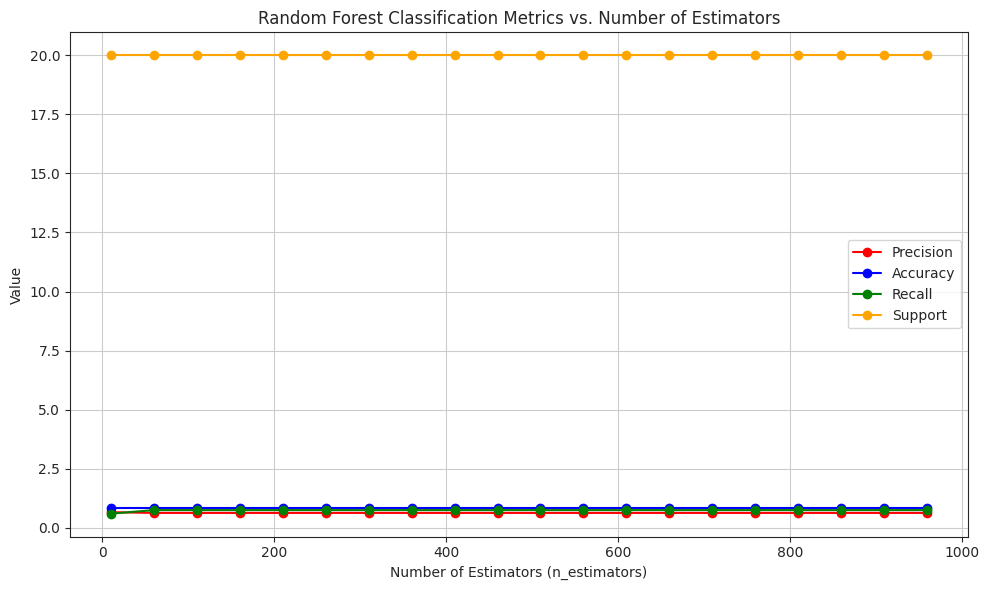

In [45]:
n_estimators_values = range(10, 1001, 50)
rf_precisions = []
rf_accuracies = []
rf_recalls = []
rf_supports = []

for n_estimators in n_estimators_values:
    # Fit Random Forest model with current n_estimators value
    rf = RandomForestClassifier(class_weight="balanced", n_estimators=n_estimators, random_state=123)
    rf.fit(x_train_pca, y_train)
    y_pred_rf = rf.predict(x_test_pca)

    # Get classification report
    report = classification_report(y_test, y_pred_rf, output_dict=True)

    # Extract Precision, Recall, and Support
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    support = report["weighted avg"]["support"]

    # Append metric values to the respective lists
    rf_precisions.append(precision)
    rf_recalls.append(recall)
    rf_supports.append(support)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rf_precisions, marker='o', color='red', label='Precision')
plt.plot(n_estimators_values, [acc/100] * len(n_estimators_values), marker='o', color='blue', label='Accuracy')
plt.plot(n_estimators_values, rf_recalls, marker='o', color='green', label='Recall')
plt.plot(n_estimators_values, rf_supports, marker='o', color='orange', label='Support')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Value")
plt.title("Random Forest Classification Metrics vs. Number of Estimators")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
x

array([0, 1, 2])

In [48]:
radius = float(input("Masukkan nilai radius: "))
texture = float(input("Masukkan nilai texture: "))
perimeter = float(input("Masukkan nilai perimeter: "))
area = float(input("Masukkan nilai area: "))
smoothness = float(input("Masukkan nilai smoothness: "))
compactness = float(input("Masukkan nilai compactness: "))
symmetry = float(input("Masukkan nilai symmetry: "))
fractal_dimension = float(input("Masukkan nilai fractal dimension: "))

new_data_input = [[radius, texture, perimeter, area, smoothness, compactness, symmetry, fractal_dimension]]

input_scaled = scaler.transform(new_data_input)

input_pca = pca.transform(input_scaled)

knn_prediction = knn.predict(input_pca)
rf_prediction = rf.predict(input_pca)
if knn_prediction[0] == 1:
    print("Orang tersebut sakit (KNN)")
else:
    print("Orang tersebut tidak sakit (KNN)")

if rf_prediction[0] == 1:
    print("Orang tersebut sakit (Random Forest)")
else:
    print("Orang tersebut tidak sakit (Random Forest)")


Masukkan nilai radius: 23
Masukkan nilai texture: 12
Masukkan nilai perimeter: 1
Masukkan nilai area: 1
Masukkan nilai smoothness: 1
Masukkan nilai compactness: 0.2
Masukkan nilai symmetry: 0.1
Masukkan nilai fractal dimension: 1000
Orang tersebut sakit (KNN)
Orang tersebut sakit (Random Forest)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


# Save the Training Model

In [ ]:
import pickle

In [ ]:
models = {
    'Random Forest': rf,
    'KNN': knn,
    'Scaler' : scaler,
    'PCA' : pca
}

In [ ]:
with open('models.sav', 'wb') as f:
    pickle.dump(models, f)

In [ ]:
scaler = models["Scaler"]